In [46]:
import pandas as pd
df = pd.read_csv('./cybersecurity_intrusion_data.csv')
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [47]:
# Count total rows where attack_detected is 1
total_attacks = df[df['attack_detected'] == 1].shape[0]
print(f"Total number of attacks detected: {total_attacks}")

Total number of attacks detected: 4264


In [48]:
df.drop(columns=['attack_detected'], inplace=True)

In [49]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0


In [50]:
df.shape

(9537, 10)

In [51]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
dtype: int64

In [53]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [54]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [63]:
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(df_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [64]:
df['anomaly_score'] = model.decision_function(df_scaled)
df['anomaly'] = model.predict(df_scaled)

In [65]:
df.to_csv('cybersecurity_intrusion_detection_anomalies.csv', index=False)

In [66]:
num_anomalies = (df['anomaly'] == -1).sum()
print(f'Number of anomalies detected: {num_anomalies}')

Number of anomalies detected: 954


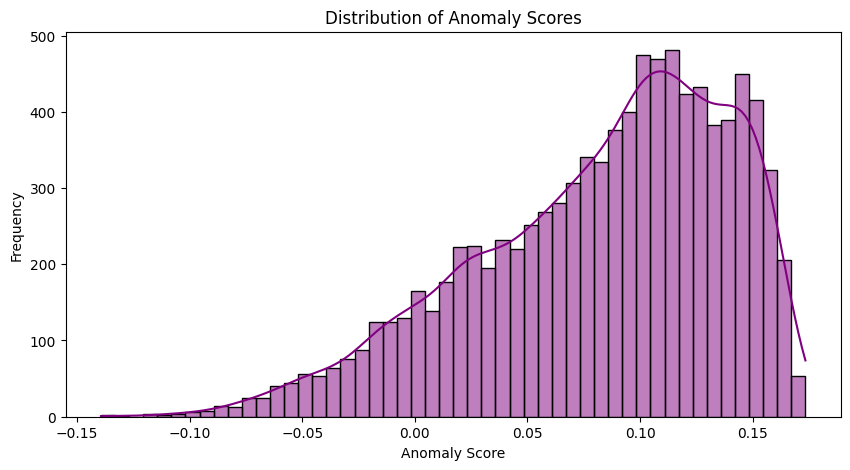

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['anomaly_score'], bins=50, kde=True, color='purple')
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

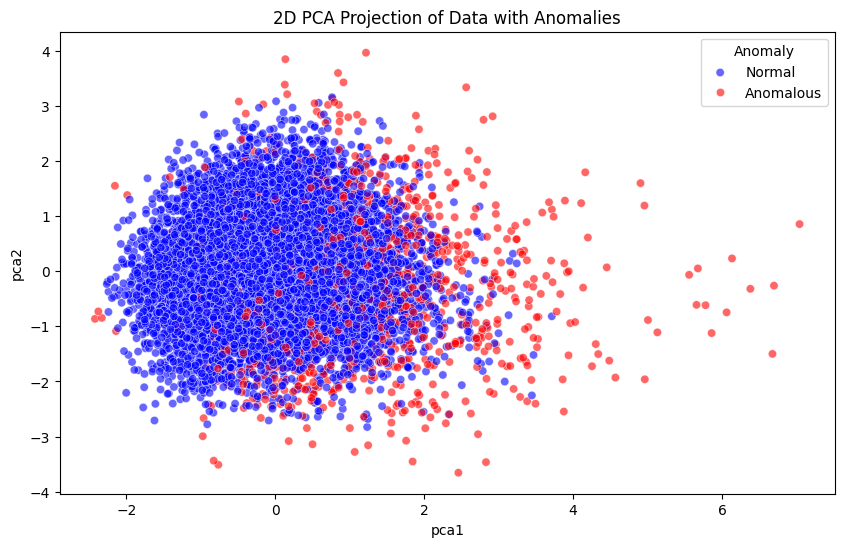

In [17]:
from sklearn.decomposition import PCA
# Reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='anomaly', palette={1: 'blue', -1: 'red'}, alpha=0.6)
plt.title("2D PCA Projection of Data with Anomalies")
plt.legend(title='Anomaly', labels=['Normal', 'Anomalous'])
plt.show()